In [2]:
import pandas as pd
import sys
sys.path.append('../..')
import sla



In [2]:
structured_logs = pd.read_csv('./data/structured_logs.csv')
structured_logs['datetime'] = pd.to_datetime(structured_logs['date'] + ' ' + structured_logs['time'])
structured_logs.head()

,date,time,level,ip,category,message,datetime
0,2025 Feb 7,13:00:01,notice,10.2.1.20,System,Log rotation: Successfully rotated Activity Log.,2025-02-07 13:00:01
1,2025 Feb 7,13:00:17,notice,10.2.1.20,Host Listener,Accepted connection 1 from Client:10.8.63.24 o...,2025-02-07 13:00:17
2,2025 Feb 7,13:00:17,notice,10.2.1.20,Host Listener,Accepted connection 2 from Client:10.8.63.24 o...,2025-02-07 13:00:17
3,2025 Feb 7,13:00:17,notice,10.2.1.20,Host Listener,"Listener(Port 8005, NIC 1) - socket 23 closed",2025-02-07 13:00:17
4,2025 Feb 7,13:00:17,notice,10.2.1.20,Host Listener,"Listener(Port 8005, NIC 1) - socket 24 closed",2025-02-07 13:00:17


### Agregación de datos String

In [3]:
import sla.transformer

# Crear instancia del agregador
aggregator = sla.transformer.StringAggregator(structured_logs, timestamp_column='datetime')
    
    # Definir métricas personalizadas
column_metrics = {
'category': ['count'],
'ip': ['nunique'],
'datetime': ['mean', 'max', 'min']
    }
    
# Definir conteo por categorías
category_count_columns = {
        'level': list(set(structured_logs.level.to_list())),
        'category': list(set(structured_logs.category.to_list()))
    }
    
aggregate_logs = aggregator.create_time_aggregation(
        time_window='5min', 
        column_metrics=column_metrics,
        category_count_columns=category_count_columns
    )

aggregate_logs.rename(columns={'category_count':'total_events'},inplace=True)
aggregate_logs.head()

,total_events,ip_nunique,level_alert_count,level_critical_count,level_debug_count,level_information_count,level_notice_count,category_ACS_count,category_Front Panel_count,category_Logger_count,category_System_count,category_SNMP Agent_count,category_Process Monitor_count,category_Host Listener_count,avg_time_between_events_seconds,min_time_between_events_seconds,max_time_between_events_seconds
2024-10-31 02:00:00,4,1,0,0,1,0,3,2,0,0,1,1,0,0,49.333333,0.0,148.0
2024-10-31 02:05:00,3,1,0,0,1,0,2,2,0,0,0,1,0,0,0.000000,0.0,0.0
2024-10-31 02:10:00,3,1,0,0,1,0,2,2,0,0,0,1,0,0,0.000000,0.0,0.0
2024-10-31 02:15:00,4,1,0,0,2,0,2,2,0,0,0,2,0,0,0.333333,0.0,1.0
2024-10-31 02:20:00,3,1,0,0,1,0,2,2,0,0,0,1,0,0,0.000000,0.0,0.0


### Ventana deslizante 

In [4]:
 # Initialize transformer
transformer =  sla.transformer.RollingAgregator(
        window_size=10,
        aggregation_functions=['mean', 'std', 'min', 'max'],
    )
    
# Apply transformation
rolling_logs = transformer.fit_transform(aggregate_logs).fillna(0)
rolling_logs.head()

,total_events,ip_nunique,level_alert_count,level_critical_count,level_debug_count,level_information_count,level_notice_count,category_ACS_count,category_Front Panel_count,category_Logger_count,...,avg_time_between_events_seconds_rolling_min,avg_time_between_events_seconds_rolling_max,min_time_between_events_seconds_rolling_mean,min_time_between_events_seconds_rolling_std,min_time_between_events_seconds_rolling_min,min_time_between_events_seconds_rolling_max,max_time_between_events_seconds_rolling_mean,max_time_between_events_seconds_rolling_std,max_time_between_events_seconds_rolling_min,max_time_between_events_seconds_rolling_max
2024-10-31 02:00:00,4,1,0,0,1,0,3,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-31 02:05:00,3,1,0,0,1,0,2,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-31 02:10:00,3,1,0,0,1,0,2,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-31 02:15:00,4,1,0,0,2,0,2,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-31 02:20:00,3,1,0,0,1,0,2,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Isolation Forest

In [5]:
import sla.detectors

X_train = rolling_logs

if_detector = sla.detectors.IsolationForestDetector(n_estimators=100, random_state=42, contamination=0.01)
if_detector.fit(X_train)
predictions = if_detector.predict(X_train)
scores = if_detector.decision_function(X_train)
anomalies = if_detector.get_anomalies(X_train)
proba = if_detector.predict_proba(X_train)


anomalies.head()


,total_events,ip_nunique,level_alert_count,level_critical_count,level_debug_count,level_information_count,level_notice_count,category_ACS_count,category_Front Panel_count,category_Logger_count,...,avg_time_between_events_seconds_rolling_min,avg_time_between_events_seconds_rolling_max,min_time_between_events_seconds_rolling_mean,min_time_between_events_seconds_rolling_std,min_time_between_events_seconds_rolling_min,min_time_between_events_seconds_rolling_max,max_time_between_events_seconds_rolling_mean,max_time_between_events_seconds_rolling_std,max_time_between_events_seconds_rolling_min,max_time_between_events_seconds_rolling_max
2024-10-31 02:45:00,3,1,0,0,1,0,2,2,0,0,...,0.0,49.333333,0.0,0.0,0.0,0.0,14.9,46.767629,0.0,148.0
2024-10-31 09:25:00,5,1,0,0,1,0,4,2,0,0,...,0.0,12.250000,0.0,0.0,0.0,0.0,4.8,14.830899,0.0,47.0
2024-10-31 09:30:00,4,1,0,0,2,0,2,2,0,0,...,0.0,12.250000,0.0,0.0,0.0,0.0,4.9,14.798273,0.0,47.0
2024-10-31 10:10:00,4,1,0,0,2,0,2,2,0,0,...,0.0,12.250000,0.0,0.0,0.0,0.0,4.9,14.798273,0.0,47.0
2024-10-31 15:00:00,6,1,0,0,2,0,4,4,0,0,...,0.0,28.200000,0.0,0.0,0.0,0.0,14.1,44.588115,0.0,141.0


### Visualizer

In [6]:
X_train['anomaly'] = predictions
X_train['scores'] = scores*-1

/Users/jomaver/.pyenv/versions/3.12.8/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


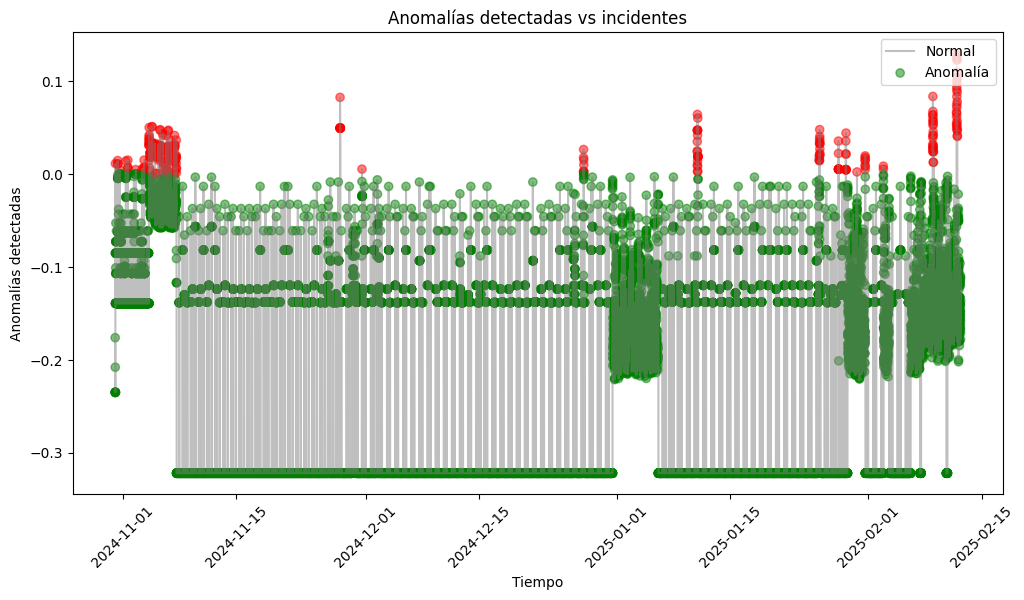

In [7]:
import sla.visualization
plots = sla.visualization.AnomalyVisualizer(X_train)
plots.plot_static()

In [8]:
plots.plot_dynamic()

### SHAP

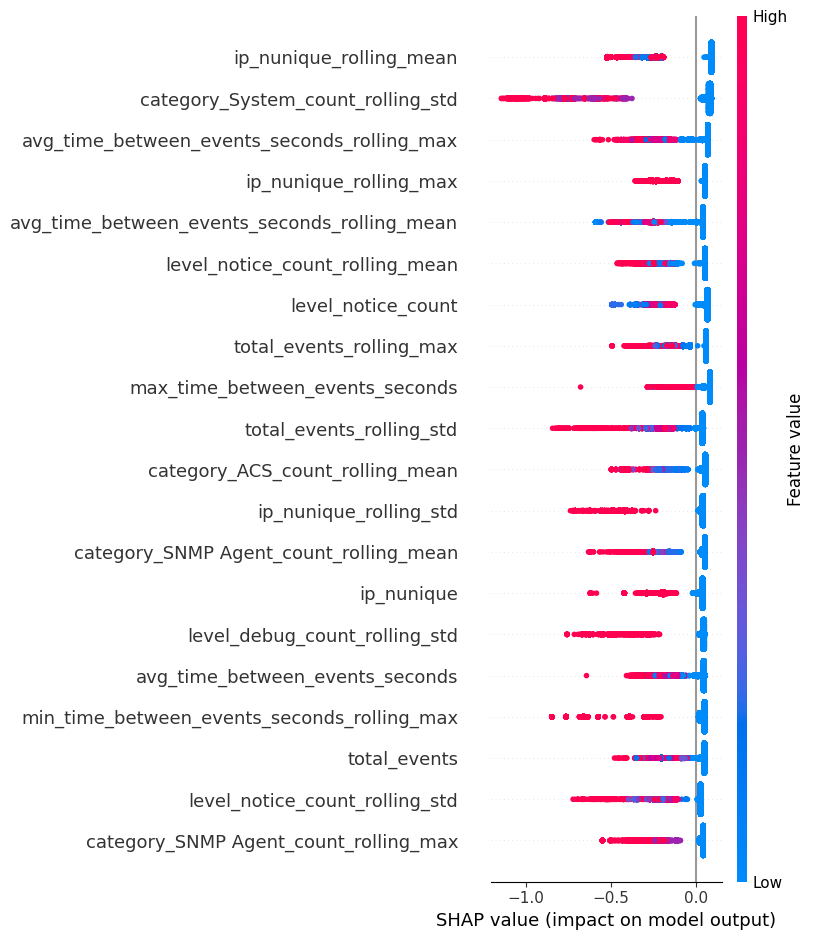

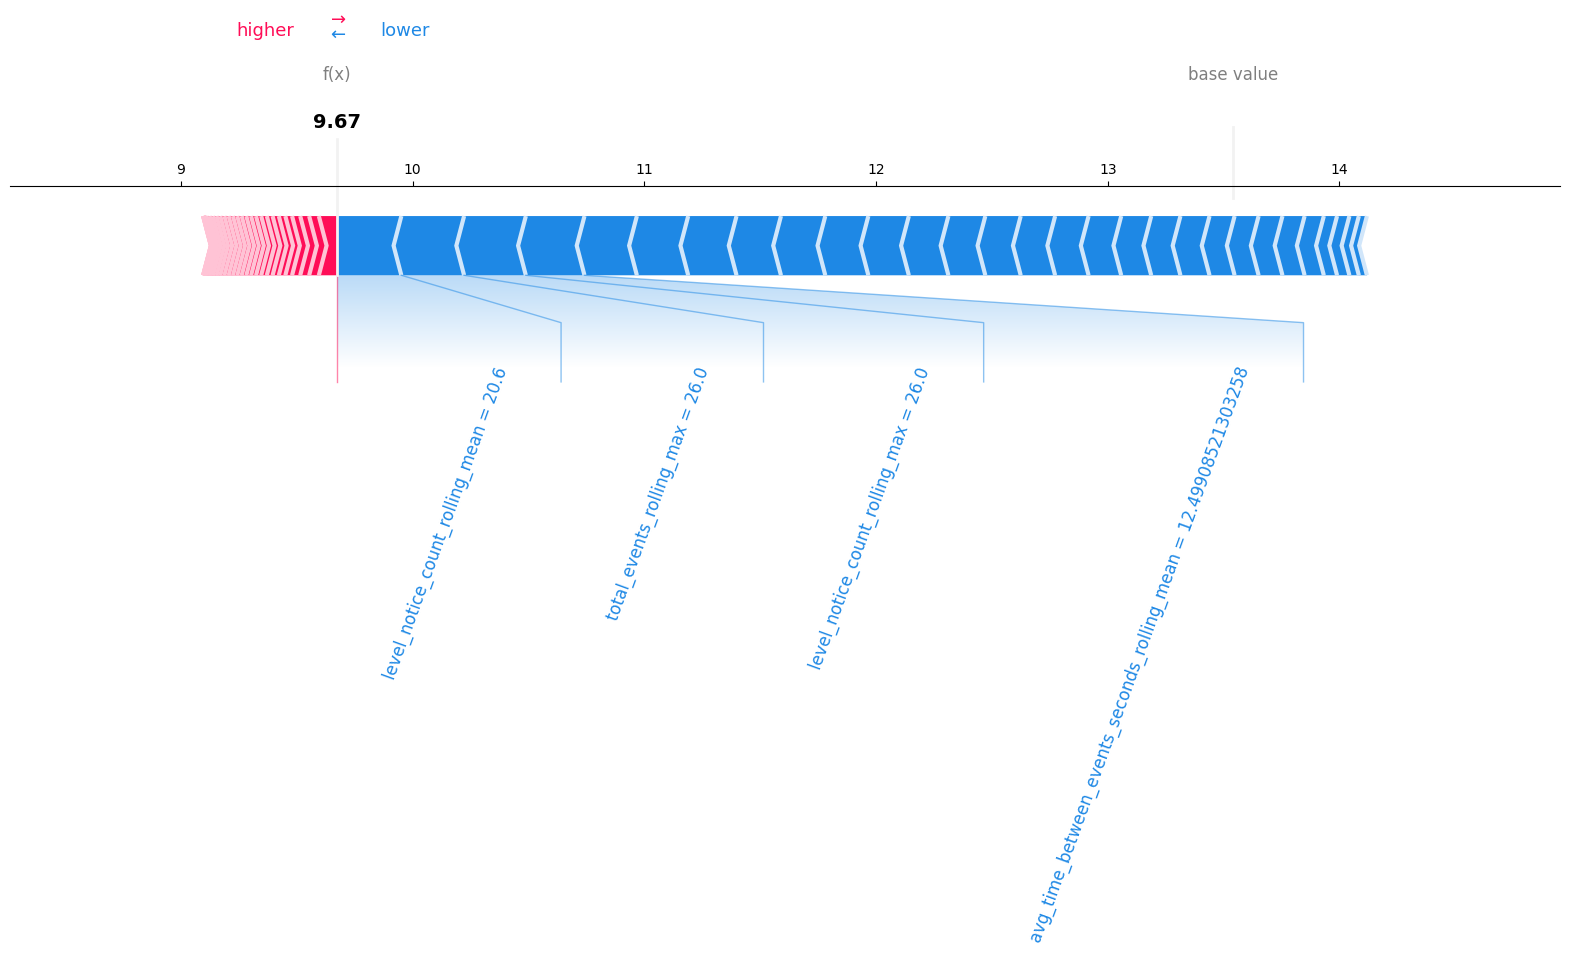

In [9]:
explainer = sla.visualization.SHAPVisualizer(if_detector)
explainer.plot_summary(X_train)
explainer.plot_force(X_train,-10)

### RRCF

In [10]:
import numpy as np
# Initialize the detector
rrcf_detector = sla.detectors.RRCFDetector()

# Get anomaly scores
anomaly_scores = rrcf_detector.fit_predict(rolling_logs.tail(300))

# Get anomalies with a threshold
anomalies = rrcf_detector.get_anomalies(threshold=np.percentile(anomaly_scores, 95))

# Print the results
print("Anomaly Scores:\n", anomaly_scores)
print("Anomalies:\n", anomalies)

Anomaly Scores:
 0       8.999104
1      13.067516
2       9.581902
3      10.040844
4      12.945688
         ...    
295     7.605921
296     4.836895
297     4.402191
298     4.889804
299    95.384513
Length: 300, dtype: float64
Anomalies:
 146    32.149353
147    31.196770
150    43.523053
151    33.584851
152    35.432375
153    35.471861
154    38.786734
160    28.198251
161    53.545791
162    38.957650
166    39.600579
172    30.238213
183    29.703395
214    56.500124
299    95.384513
dtype: float64


In [11]:
X_train = rolling_logs.tail(300).copy()
X_train['anomaly'] = [-1 if score > np.percentile(anomaly_scores, 95) else 0 for score in anomaly_scores]
X_train['scores'] = anomaly_scores.values
X_train.head()

,total_events,ip_nunique,level_alert_count,level_critical_count,level_debug_count,level_information_count,level_notice_count,category_ACS_count,category_Front Panel_count,category_Logger_count,...,min_time_between_events_seconds_rolling_mean,min_time_between_events_seconds_rolling_std,min_time_between_events_seconds_rolling_min,min_time_between_events_seconds_rolling_max,max_time_between_events_seconds_rolling_mean,max_time_between_events_seconds_rolling_std,max_time_between_events_seconds_rolling_min,max_time_between_events_seconds_rolling_max,anomaly,scores
2025-02-11 09:05:00,22,1,0,0,0,0,22,0,0,0,...,0.0,0.0,0.0,0.0,60.7,0.483046,60.0,61.0,0,8.999104
2025-02-11 09:10:00,12,1,0,0,0,0,12,0,0,0,...,0.0,0.0,0.0,0.0,60.6,0.516398,60.0,61.0,0,13.067516
2025-02-11 09:15:00,14,1,0,0,0,0,14,0,0,0,...,0.0,0.0,0.0,0.0,60.6,0.516398,60.0,61.0,0,9.581902
2025-02-11 09:20:00,20,1,0,0,0,0,20,0,0,0,...,0.0,0.0,0.0,0.0,60.6,0.516398,60.0,61.0,0,10.040844
2025-02-11 09:25:00,20,1,0,0,0,0,20,0,0,0,...,0.0,0.0,0.0,0.0,60.5,0.527046,60.0,61.0,0,12.945688


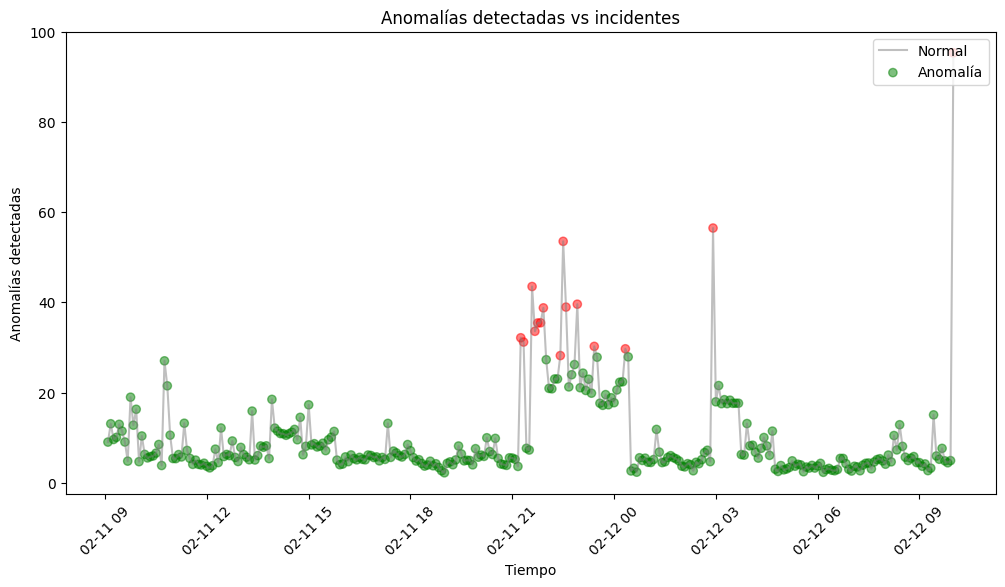

In [12]:
import sla.visualization
plots = sla.visualization.AnomalyVisualizer(X_train)
plots.plot_static()

In [13]:
plots.plot_dynamic()

## Streaming Anomaly detection Simulation


In [3]:
import sla.simulation
data_source = pd.read_csv('./data/PDTI_Feb_11_2025.csv', index_col=0).sort_index()
    
# Example events DataFrame
events = pd.DataFrame({
        'start': ['2025-02-11 22:00:00', '2025-02-11 23:59:00'],
        'end': ['2025-02-12 00:00:00', '2025-02-12 00:11:00'],
        'color':['orange','red'],
        'label':['Reinicio Caja 1 HSM', 'Incidente Mi Bancolombia, entre otros']
    })

dashboard = sla.simulation.StreamingSimulation(data_source, chunk_size=50, stream_interval=1, window_size=100, threshold=0.14, dynamic_threshold=False, events=events)
dashboard.run()

Detected 0 anomalies in the current chunk.
Detected 5 anomalies in the current chunk.


2025-04-14 11:14:54.194 python[33345:690753] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-14 11:14:54.194 python[33345:690753] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Detected 0 anomalies in the current chunk.
Detected 4 anomalies in the current chunk.
Detected 16 anomalies in the current chunk.
Detected 9 anomalies in the current chunk.
Detected 0 anomalies in the current chunk.
Detected 1 anomalies in the current chunk.
Detected 12 anomalies in the current chunk.
Detected 2 anomalies in the current chunk.
Detected 0 anomalies in the current chunk.
Stopping simulation...
